In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

CARGO LOS ARCHIVOS Y LOS CONVIERTO A DATAFRAME (LOS DOS)

In [2]:
df_vuelos = pd.read_csv("./Customer Flight Activity.csv")
df_loyalty = pd.read_csv("./Customer Loyalty History.csv")

BUSCO LOS DATOS GENERALES DEL DATAFRAME 

In [3]:
df_loyalty.shape

(16737, 16)

In [4]:
df_vuelos.shape

(405624, 10)

In [5]:
df_vuelos.sample(2)

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
83134           926874  2017      5               0                        0   
117094          936305  2017      7              12                        3   

        Total Flights  Distance  Points Accumulated  Points Redeemed  \
83134               0         0                 0.0                0   
117094             15      1215               121.0                0   

        Dollar Cost Points Redeemed  
83134                             0  
117094                            0

In [6]:
df_loyalty.sample(2)

Loyalty Number Country Province      City Postal Code  Gender  \
10591          431829  Canada   Quebec  Montreal     H2Y 2W2  Female   
4408           712521  Canada  Ontario    Ottawa     K1F 2R2    Male   

                  Education   Salary Marital Status Loyalty Card      CLV  \
10591  High School or Below  43650.0        Married         Star  2461.80   
4408               Bachelor  78245.0       Divorced         Nova  2849.25   

      Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
10591        Standard             2016                12                NaN   
4408         Standard             2015                 9                NaN   

       Cancellation Month  
10591                 NaN  
4408                  NaN

VOY A UNIR LOS DOS DATAFRAME CON UN MERGE POR QUE TIENEN UNA COLUMNA EN COMUN 

In [7]:
# termine haciendo un inner merge 

df_unido_merge = df_loyalty.merge(df_vuelos, on= "Loyalty Number")
df_unido_merge


Loyalty Number Country  Province      City Postal Code  Gender  \
0               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
1               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
2               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
3               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
4               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
...                ...     ...       ...       ...         ...     ...   
405619          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405620          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405621          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405622          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405623          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   

       Education   Salary Marital Status Loyalty Card       CLV  \
0       Bachelor  83236.0        Married         Star   3839.14   
1       Bachelor  83236.0        Married         Star   3839.14   
2       Bachelor  83236.0        Married         Star   3839.14   
3       Bachelor  83236.0        Married         Star   3839.14   
4       Bachelor  83236.0        Married         Star   3839.14   
...          ...      ...            ...          ...       ...   
405619  Bachelor  75049.0        Married         Star  83325.38   
405620  Bachelor  75049.0        Married         Star  83325.38   
405621  Bachelor  75049.0        Married         Star  83325.38   
405622  Bachelor  75049.0        Married         Star  83325.38   
405623  Bachelor  75049.0        Married         Star  83325.38   

       Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
0             Standard             2016                 2                NaN   
1             Standard             2016                 2                NaN   
2             Standard             2016                 2                NaN   
3             Standard             2016                 2                NaN   
4             Standard             2016                 2                NaN   
...                ...              ...               ...                ...   
405619        Standard             2015                12             2016.0   
405620        Standard             2015                12             2016.0   
405621        Standard             2015                12             2016.0   
405622        Standard             2015                12             2016.0   
405623        Standard             2015                12             2016.0   

        Cancellation Month  Year  Month  Flights Booked  \
0                      NaN  2017      1               0   
1                      NaN  2017      2               3   
2                      NaN  2017      3               0   
3                      NaN  2017      4               0   
4                      NaN  2018     10               6   
...                    ...   ...    ...             ...   
405619                 8.0  2018      8               0   
405620                 8.0  2018      9               0   
405621                 8.0  2018     10               0   
405622                 8.0  2018     11               0   
405623                 8.0  2018     12               0   

        Flights with Companions  Total Flights  Distance  Points Accumulated  \
0                             0              0         0                 0.0   
1                             0              3      2823               282.0   
2                             0              0         0                 0.0   
3                             0              0         0                 0.0   
4                             2              8      3352               335.0   
...                         ...            ...       ...                 ...   
405619                        0              0         0                 0.0   
4056

In [8]:
def exploracion_dataframe(dataframe):

    #Nos enseña los duplicados en el DF
    print(f"Tenemos {dataframe.duplicated().sum()} duplicados en el conjunto de datos.")
    print("\n ----- \n")
    
    
    #Nos muestra un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ----- \n")
    #Nos muestra los tipos de columnas
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ----- \n")
    #Nos muestra los valores de las columnas categóricas
    print("Los valores que tenemos para las COLUMNAS CATEGÓRICAS son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
    #Sacamos los principales estadísticos de cada una de las categorías

    columnas_numericas = dataframe.select_dtypes(include=['int', 'float']).columns
    columnas_categoricas = dataframe.select_dtypes(include='O').columns

    for col in columnas_categoricas:
        print("\n ----- \n")
        print(f"Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el {col.upper()} son: ")
        display(dataframe[[col]].describe().T)

    for col in columnas_numericas:
        print("\n ----- \n")
        print(f"Los principales estadísticos de las COLUMNAS NUMÉRICAS para el {col.upper()} son: ")
        display(dataframe[[col]].describe().T)

In [9]:
exploracion_dataframe(df_unido_merge)

Tenemos 1864 duplicados en el conjunto de datos.

 ----- 

Los nulos que tenemos en el conjunto de datos son:


%_nulos
Salary              25.312112
Cancellation Year   87.657535
Cancellation Month  87.657535


 ----- 

Los tipos de las columnas son:


tipo_dato
Loyalty Number                  int64
Country                        object
Province                       object
City                           object
Postal Code                    object
Gender                         object
Education                      object
Salary                        float64
Marital Status                 object
Loyalty Card                   object
CLV                           float64
Enrollment Type                object
Enrollment Year                 int64
Enrollment Month                int64
Cancellation Year             float64
Cancellation Month            float64
Year                            int64
Month                           int64
Flights Booked                  int64
Flights with Companions         int64
Total Flights                   int64
Distance                        int64
Points Accumulated            float64
Points Redeemed                 int64
Dollar Cost Points Redeemed     int64


 ----- 

Los valores que tenemos para las COLUMNAS CATEGÓRICAS son: 
La columna COUNTRY tiene las siguientes valores únicos:


Country
Canada   405624

La columna PROVINCE tiene las siguientes valores únicos:


Province
Ontario             130896
British Columbia    106848
Quebec               79968
Alberta              23400
Manitoba             15984

La columna CITY tiene las siguientes valores únicos:


City
Toronto    81096
Vancouver  62520
Montreal   49920
Winnipeg   15984
Whistler   14040

La columna POSTAL CODE tiene las siguientes valores únicos:


Postal Code
V6E 3D9        21984
V5R 1W3        16608
V6T 1Y8        14040
V6E 3Z3        13200
M2M 7K8        12936

La columna GENDER tiene las siguientes valores únicos:


Gender
Female  203640
Male    201984

La columna EDUCATION tiene las siguientes valores únicos:


Education
Bachelor                 253752
College                  102672
High School or Below      19008
Doctor                    17856
Master                    12336

La columna MARITAL STATUS tiene las siguientes valores únicos:


Marital Status
Married           235800
Single            108648
Divorced           61176

La columna LOYALTY CARD tiene las siguientes valores únicos:


Loyalty Card
Star          184224
Nova          137568
Aurora         83832

La columna ENROLLMENT TYPE tiene las siguientes valores únicos:


Enrollment Type
Standard                 382200
2018 Promotion            23424


 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el COUNTRY son: 


count unique     top    freq
Country  405624      1  Canada  405624


 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el PROVINCE son: 


count unique      top    freq
Province  405624     11  Ontario  130896


 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el CITY son: 


count unique      top   freq
City  405624     29  Toronto  81096


 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el POSTAL CODE son: 


count unique      top   freq
Postal Code  405624     55  V6E 3D9  21984


 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el GENDER son: 


count unique     top    freq
Gender  405624      2  Female  203640


 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el EDUCATION son: 


count unique       top    freq
Education  405624      5  Bachelor  253752


 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el MARITAL STATUS son: 


count unique      top    freq
Marital Status  405624      3  Married  235800


 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el LOYALTY CARD son: 


count unique   top    freq
Loyalty Card  405624      3  Star  184224


 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el ENROLLMENT TYPE son: 


count unique       top    freq
Enrollment Type  405624      2  Standard  382200


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el LOYALTY NUMBER son: 


count           mean            std       min       25%  \
Loyalty Number  405624.0  550037.873084  258935.286969  100018.0  326961.0   

                     50%       75%       max  
Loyalty Number  550834.0  772194.0  999986.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el SALARY son: 


count          mean           std      min      25%      50%  \
Salary  302952.0  79268.825953  34992.133508 -58486.0  59262.0  73479.0   

            75%       max  
Salary  88612.0  407228.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el CLV son: 


count         mean          std      min      25%      50%      75%  \
CLV  405624.0  7991.976226  6863.663857  1898.01  3985.32  5776.34  8936.82   

          max  
CLV  83325.38


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el ENROLLMENT YEAR son: 


count         mean       std     min     25%     50%  \
Enrollment Year  405624.0  2015.252529  1.979427  2012.0  2014.0  2015.0   

                    75%     max  
Enrollment Year  2017.0  2018.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el ENROLLMENT MONTH son: 


count      mean       std  min  25%  50%   75%   max
Enrollment Month  405624.0  6.668008  3.399766  1.0  4.0  7.0  10.0  12.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el CANCELLATION YEAR son: 


count         mean       std     min     25%     50%  \
Cancellation Year  50064.0  2016.499521  1.384336  2013.0  2016.0  2017.0   

                      75%     max  
Cancellation Year  2018.0  2018.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el CANCELLATION MONTH son: 


count      mean     std  min  25%  50%   75%   max
Cancellation Month  50064.0  6.966443  3.4483  1.0  4.0  7.0  10.0  12.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el YEAR son: 


count    mean       std     min     25%     50%     75%     max
Year  405624.0  2017.5  0.500001  2017.0  2017.0  2017.5  2018.0  2018.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el MONTH son: 


count  mean       std  min   25%  50%   75%   max
Month  405624.0   6.5  3.452057  1.0  3.75  6.5  9.25  12.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el FLIGHTS BOOKED son: 


count      mean       std  min  25%  50%  75%   max
Flights Booked  405624.0  4.115052  5.225518  0.0  0.0  1.0  8.0  21.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el FLIGHTS WITH COMPANIONS son: 


count      mean       std  min  25%  50%  75%  \
Flights with Companions  405624.0  1.031805  2.076869  0.0  0.0  0.0  1.0   

                          max  
Flights with Companions  11.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el TOTAL FLIGHTS son: 


count      mean       std  min  25%  50%   75%   max
Total Flights  405624.0  5.146858  6.521227  0.0  0.0  1.0  10.0  32.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el DISTANCE son: 


count         mean         std  min  25%    50%     75%     max
Distance  405624.0  1208.880059  1433.15532  0.0  0.0  488.0  2336.0  6293.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el POINTS ACCUMULATED son: 


count        mean         std  min  25%   50%    75%  \
Points Accumulated  405624.0  123.692721  146.599831  0.0  0.0  50.0  239.0   

                      max  
Points Accumulated  676.5


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el POINTS REDEEMED son: 


count       mean         std  min  25%  50%  75%    max
Points Redeemed  405624.0  30.696872  125.486049  0.0  0.0  0.0  0.0  876.0


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el DOLLAR COST POINTS REDEEMED son: 


count      mean        std  min  25%  50%  \
Dollar Cost Points Redeemed  405624.0  2.484503  10.150038  0.0  0.0  0.0   

                             75%   max  
Dollar Cost Points Redeemed  0.0  71.0

In [10]:
df_unido_merge.shape

(405624, 25)

BUSCAMOS NULOS

In [11]:
df_unido_merge.isnull().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

In [12]:
# vamos a ver que columnas tienen valores nulos en porcentaje
df_unido_merge.isnull().sum()[df_unido_merge.isnull().sum() > 0] / df_unido_merge.shape[0]*100

Salary                25.312112
Cancellation Year     87.657535
Cancellation Month    87.657535
dtype: float64

BUSCAMOS LOS DUPLICADOS

In [13]:
df_unido_merge.duplicated().sum()

1864

In [14]:
# Filtra las filas duplicadas en todo el DataFrame
duplicates = df_unido_merge[df_unido_merge.duplicated()]

# Verifica si hay duplicados en cada columna
for column in df_unido_merge.columns:
    if duplicates[column].any():
        print(f"La columna '{column}' contiene duplicados.")

La columna 'Loyalty Number' contiene duplicados.
La columna 'Country' contiene duplicados.
La columna 'Province' contiene duplicados.
La columna 'City' contiene duplicados.
La columna 'Postal Code' contiene duplicados.
La columna 'Gender' contiene duplicados.
La columna 'Education' contiene duplicados.
La columna 'Salary' contiene duplicados.
La columna 'Marital Status' contiene duplicados.
La columna 'Loyalty Card' contiene duplicados.
La columna 'CLV' contiene duplicados.
La columna 'Enrollment Type' contiene duplicados.
La columna 'Enrollment Year' contiene duplicados.
La columna 'Enrollment Month' contiene duplicados.
La columna 'Cancellation Year' contiene duplicados.
La columna 'Cancellation Month' contiene duplicados.
La columna 'Year' contiene duplicados.
La columna 'Month' contiene duplicados.


In [15]:
df_unido_merge['Loyalty Number'].value_counts()

678205    72
368073    48
981508    48
486860    48
373638    48
          ..
757446    24
531293    24
763132    24
271680    24
652627    24
Name: Loyalty Number, Length: 16737, dtype: int64

In [16]:
df_unido_merge['Loyalty Number'].duplicated().sum()

388887

con lo siguiente voy a eliminar los duplicados que existen en la columna de loyalty number y mantener la primera fila 

In [17]:
df_unido_merge.drop_duplicates(subset=["Loyalty Number"], keep='first', inplace=True)

In [18]:
df_unido_merge

Loyalty Number Country          Province        City Postal Code  \
0               480934  Canada           Ontario     Toronto     M2Z 4K1   
24              549612  Canada           Alberta    Edmonton     T3G 6Y6   
48              429460  Canada  British Columbia   Vancouver     V6E 3D9   
72              608370  Canada           Ontario     Toronto     P1W 1K4   
96              530508  Canada            Quebec        Hull     J8Y 3Z5   
...                ...     ...               ...         ...         ...   
405504          823768  Canada  British Columbia   Vancouver     V6E 3Z3   
405528          680886  Canada      Saskatchewan      Regina     S1J 3C5   
405552          776187  Canada  British Columbia   Vancouver     V5R 1W3   
405576          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
405600          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

        Gender Education    Salary Marital Status Loyalty Card       CLV  \
0       Female  Bachelor   83236.0        Married         Star   3839.14   
24        Male   College       NaN       Divorced         Star   3839.61   
48        Male   College       NaN         Single         Star   3839.75   
72        Male   College       NaN         Single         Star   3839.75   
96        Male  Bachelor  103495.0        Married         Star   3842.79   
...        ...       ...       ...            ...          ...       ...   
405504  Female   College       NaN        Married         Star  61850.19   
405528  Female  Bachelor   89210.0        Married         Star  67907.27   
405552    Male   College       NaN         Single         Star  74228.52   
405576    Male  Bachelor  -57297.0        Married         Star  10018.66   
405600  Female  Bachelor   75049.0        Married         Star  83325.38   

       Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
0             Standard             2016                 2                NaN   
24            Standard             2016                 3                NaN   
48            Standard             2014                 7             2018.0   
72            Standard             2013                 2                NaN   
96            Standard             2014                10                NaN   
...                ...              ...               ...                ...   
405504        Standard             2012                12                NaN   
405528        Standard             2014                 9                NaN   
405552        Standard             2014                 3                NaN   
405576  2018 Promotion             2018                 4                NaN   
405600        Standard             2015                12             2016.0   

        Cancellation Month  Year  Month  Flights Booked  \
0                      NaN  2017      1               0   
24                     NaN  2017      1               9   
48                     1.0  2017      1               8   
72                     NaN  2017      3              15   
96                     NaN  2017      1               0   
...                    ...   ...    ...             ...   
405504                 NaN  2017      1              11   
405528                 NaN  2017      1              11   
405552                 NaN  2017      1               7   
405576                 NaN  2017      1              11   
405600                 8.0  2017      1               0   

        Flights with Companions  Total Flights  Distance  Points Accumulated  \
0                             0              0         0                 0.0   
24                            1             10      1860               186.0   
48                            0              8      2960               296.0   
72                            7             22      3960               396.0   
96                            0              0         0                 0.0   
...                         ... 

In [20]:
df_unido_merge.shape

(16737, 25)

tamnien podria haberlo hecho con lo sgiueinte 

In [ ]:
# Eliminar las filas duplicadas
# df_unido_merge = df_unido_merge.drop_duplicates()

# Mostrar el DataFrame resultante
# df_unido_merge

SACAMOS LOS ESTADISTICOS DE NUESTRAS COLUMNAS, SEPARADAS POR CATEGORICAS O NUMERICAS

In [21]:
# principales estadisticos de todas las columnas
print("columnas numericas son :")
display(df_unido_merge.describe().T)
print(".............")
print("columnas categoricas son :")
display(df_unido_merge.describe(include = "O").T)

columnas numericas son :


count           mean            std        min  \
Loyalty Number               16737.0  549735.880445  258912.132453  100018.00   
Salary                       12499.0   79245.609409   35008.297285  -58486.00   
CLV                          16737.0    7988.896536    6860.982280    1898.01   
Enrollment Year              16737.0    2015.253211       1.979111    2012.00   
Enrollment Month             16737.0       6.669116       3.398958       1.00   
Cancellation Year             2067.0    2016.503145       1.380743    2013.00   
Cancellation Month            2067.0       6.962748       3.455297       1.00   
Year                         16737.0    2017.014758       0.120585    2017.00   
Month                        16737.0       1.205055       1.112146       1.00   
Flights Booked               16737.0       2.860190       4.037829       0.00   
Flights with Companions      16737.0       0.709924       1.579299       0.00   
Total Flights                16737.0       3.570114       5.070582       0.00   
Distance                     16737.0     884.716795    1195.912393       0.00   
Points Accumulated           16737.0      88.527427     120.022551       0.00   
Points Redeemed              16737.0      11.647488      66.312553       0.00   
Dollar Cost Points Redeemed  16737.0       0.946884       5.389290       0.00   

                                   25%        50%        75%        max  
Loyalty Number               326603.00  550434.00  772019.00  999986.00  
Salary                        59246.50   73455.00   88517.50  407228.00  
CLV                            3980.84    5780.18    8940.58   83325.38  
Enrollment Year                2014.00    2015.00    2017.00    2018.00  
Enrollment Month                  4.00       7.00      10.00      12.00  
Cancellation Year              2016.00    2017.00    2018.00    2018.00  
Cancellation Month                4.00       7.00      10.00      12.00  
Year                           2017.00    2017.00    2017.00    2018.00  
Month                             1.00       1.00       1.00      12.00  
Flights Booked                    0.00       0.00       6.00      21.00  
Flights with Companions           0.00       0.00       0.00      11.00  
Total Flights                     0.00       0.00       7.00      30.00  
Distance                          0.00       0.00    1760.00    6136.00  
Points Accumulated                0.00       0.00     176.00     613.00  
Points Redeemed                   0.00       0.00       0.00     593.00  
Dollar Cost Points Redeemed       0.00       0.00       0.00      48.00

.............
columnas categoricas son :


count unique       top   freq
Country          16737      1    Canada  16737
Province         16737     11   Ontario   5404
City             16737     29   Toronto   3351
Postal Code      16737     55   V6E 3D9    911
Gender           16737      2    Female   8410
Education        16737      5  Bachelor  10475
Marital Status   16737      3   Married   9735
Loyalty Card     16737      3      Star   7637
Enrollment Type  16737      2  Standard  15766

In [22]:
df_unido_merge.sample(3)

Loyalty Number Country          Province          City Postal Code  \
48432           163260  Canada  British Columbia     Vancouver     V1E 4R6   
122568          532419  Canada  British Columbia  Dawson Creek     U5I 4F1   
68112           175804  Canada  British Columbia      Victoria     V10 6T5   

        Gender Education   Salary Marital Status Loyalty Card       CLV  \
48432   Female   College      NaN         Single       Aurora   7247.31   
122568    Male  Bachelor  35424.0         Single         Star  38496.95   
68112     Male  Bachelor  70384.0         Single       Aurora   8879.79   

       Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
48432         Standard             2015                11                NaN   
122568  2018 Promotion             2018                 2                NaN   
68112         Standard             2017                 5                NaN   

        Cancellation Month  Year  Month  Flights Booked  \
48432                  NaN  2017      1               5   
122568                 NaN  2017      1               0   
68112                  NaN  2017      1               0   

        Flights with Companions  Total Flights  Distance  Points Accumulated  \
48432                         3              8      1480               148.0   
122568                        0              0         0                 0.0   
68112                         0              0         0                 0.0   

        Points Redeemed  Dollar Cost Points Redeemed  
48432                 0                            0  
122568                0                            0  
68112                 0                            0

## gestion de nulos para la columna de salario 
- la voy a gestionar con la mediana de la columna, pues la columna es de salario y con esta opcion no se vera afectada por valores atipicos

In [23]:
salario_mediana = df_unido_merge['Salary'].median()
df_unido_merge['Salary'].fillna(salario_mediana, inplace=True)

In [24]:
# vamos a ver que columnas tienen valores nulos en porcentaje
df_unido_merge.isnull().sum()[df_unido_merge.isnull().sum() > 0] / df_unido_merge.shape[0]*100

Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

YO RECOMENDARIA ELIMINAR ESTAS DOS COLUMNAS PERO LAS DEJAREMOS POR QUE TAL VEZ ESTO IMPLICA QUE NO HAN CANCELADO TODAVIA CON LA EMPRESA Y EN UN FUTURO PUEDE NECESITARSE

In [25]:
df_unido_merge["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [26]:
df_unido_merge["Cancellation Month"].unique()

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

In [27]:
columnas = ["Cancellation Year", "Cancellation Month"]

for columna in columnas:
    # Primero, relleno los valores NaN con ceros 
    df_unido_merge[columna] = df_unido_merge[columna].fillna(0)
    
    # Luego, convierto los valores a tipo de datos integer
    df_unido_merge[columna] = df_unido_merge[columna].astype(int)

In [28]:
df_unido_merge.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int64
Cancellation Month               int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

voy a pasar la columna de cancellation month de integer a que cada valor tenga los meses del año 

In [29]:
# Diccionario para mapear números de mes a nombres de mes
meses_dict1 = {
    0: 'desconocido',
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Aplicar la transformación a la columna "  cancellation month"
df_unido_merge['Cancellation Month'] = df_unido_merge['Cancellation Month'].map(meses_dict1)

# Mostrar el DataFrame resultante
df_unido_merge.sample(3)

Loyalty Number Country       Province      City Postal Code  Gender  \
134136          890702  Canada         Quebec  Montreal     H2T 9K8    Male   
173664          761600  Canada        Ontario   Trenton     K8V 4B2  Female   
330960          857481  Canada  New Brunswick   Moncton     E1A 2A7  Female   

       Education    Salary Marital Status Loyalty Card      CLV  \
134136  Bachelor  101436.0        Married         Nova  3900.91   
173664   College   73455.0        Married         Nova  6105.80   
330960  Bachelor   54235.0         Single         Star  5384.02   

       Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
134136        Standard             2014                 8                  0   
173664        Standard             2018                 7                  0   
330960        Standard             2016                 1                  0   

       Cancellation Month  Year  Month  Flights Booked  \
134136        desconocido  2017      1               1   
173664        desconocido  2017      1               0   
330960        desconocido  2017      1               3   

        Flights with Companions  Total Flights  Distance  Points Accumulated  \
134136                        0              1       146                14.0   
173664                        0              0         0                 0.0   
330960                        2              5      1300               130.0   

        Points Redeemed  Dollar Cost Points Redeemed  
134136                0                            0  
173664                0                            0  
330960                0                            0

A PESAR DE QUE ESTAS DOS COLUMAS 'Cancellation Month' Y Cancellation Year TIENEN UN GRAN PORCENTAJE DE NULOS, NO SE VAN A ELIMINAR POR SI EN UN FUTURO SE QUIEREN LLENAR CORRECTAMENTE Y ANALIZAR A POSTERIORI

TAMBIEN LA CLOUMNA DE YEAR LA CAMBIARE,  la paso de ser un integer a string con los meses del año 

In [30]:



# Diccionario para mapear números de mes a nombres de mes
meses_dict = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Aplicar la transformación a la columna "month"
df_unido_merge['Month'] = df_unido_merge['Month'].map(meses_dict)


In [31]:

# Mostrar el DataFrame resultante
df_unido_merge.sample(3)

Loyalty Number Country          Province          City Postal Code  \
157560          256821  Canada           Ontario       Sudbury     M5V 1G5   
349536          691700  Canada  British Columbia  Dawson Creek     U5I 4F1   
46896           572448  Canada  British Columbia     Vancouver     V6E 3D9   

        Gender Education   Salary Marital Status Loyalty Card      CLV  \
157560    Male  Bachelor  69872.0        Married         Nova  5194.65   
349536  Female   College  73455.0         Single         Star  7007.27   
46896     Male   College  73455.0         Single       Aurora  7054.78   

       Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
157560        Standard             2017                 9               2018   
349536        Standard             2015                 4               2018   
46896         Standard             2018                10                  0   

       Cancellation Month  Year  Month  Flights Booked  \
157560              junio  2017  enero               0   
349536             agosto  2017  enero               8   
46896         desconocido  2017  enero               0   

        Flights with Companions  Total Flights  Distance  Points Accumulated  \
157560                        0              0         0                 0.0   
349536                        0              8       784                78.0   
46896                         0              0         0                 0.0   

        Points Redeemed  Dollar Cost Points Redeemed  
157560                0                            0  
349536                0                            0  
46896                 0                            0

In [32]:
df_unido_merge['Month'].value_counts()

enero         15578
febrero         711
marzo            82
julio            51
diciembre        45
abril            43
septiembre       42
octubre          40
mayo             39
junio            39
noviembre        37
agosto           30
Name: Month, dtype: int64

In [33]:
df_unido_merge.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [34]:
df_unido_merge.sample(4)

Loyalty Number Country          Province       City Postal Code  \
216696          261715  Canada           Ontario    Toronto     M8Y 4K8   
265152          128032  Canada            Quebec   Montreal     H2Y 2W2   
287976          368669  Canada  British Columbia  Vancouver     V5R 1W3   
241752          571964  Canada  British Columbia  Vancouver     V6E 3D9   

        Gender Education   Salary Marital Status Loyalty Card       CLV  \
216696    Male  Bachelor  55641.0        Married         Nova  11701.07   
265152    Male  Bachelor  97363.0         Single         Star   2530.71   
287976    Male  Bachelor  69215.0       Divorced         Star   2776.58   
241752  Female   College  73455.0         Single         Star   2194.67   

       Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
216696        Standard             2015                 3                  0   
265152        Standard             2017                11                  0   
287976        Standard             2018                11                  0   
241752        Standard             2013                 5                  0   

       Cancellation Month  Year      Month  Flights Booked  \
216696        desconocido  2018  diciembre               3   
265152        desconocido  2017      enero               0   
287976        desconocido  2017      enero               0   
241752        desconocido  2017      enero               2   

        Flights with Companions  Total Flights  Distance  Points Accumulated  \
216696                        2              5      3815               381.0   
265152                        0              0         0                 0.0   
287976                        0              0         0                 0.0   
241752                        2              4      1112               111.0   

        Points Redeemed  Dollar Cost Points Redeemed  
216696              398                           32  
265152                0                            0  
287976                0                            0  
241752                0                            0

In [35]:
# Agrupa por año y mes y cuenta el número de vuelos reservados en cada combinación año-mes
vuelos_por_anio_mes = df_unido_merge.groupby(['Year', 'Month']).size()
vuelos_por_anio_mes

Year  Month     
2017  abril            25
      agosto           14
      diciembre        27
      enero         15555
      febrero         688
      julio            24
      junio            17
      marzo            66
      mayo             23
      noviembre        18
      octubre          16
      septiembre       17
2018  abril            18
      agosto           16
      diciembre        18
      enero            23
      febrero          23
      julio            27
      junio            22
      marzo            16
      mayo             16
      noviembre        19
      octubre          24
      septiembre       25
dtype: int64

In [36]:
# Convertir la serie a DataFrame
vuelos_por_anio_mes_df = vuelos_por_anio_mes.reset_index()
vuelos_por_anio_mes_df.columns = ['Year', 'Month', 'Cantidad de vuelos reservados']

# Muestra el DataFrame resultante
print(vuelos_por_anio_mes_df)

    Year       Month  Cantidad de vuelos reservados
0   2017       abril                             25
1   2017      agosto                             14
2   2017   diciembre                             27
3   2017       enero                          15555
4   2017     febrero                            688
5   2017       julio                             24
6   2017       junio                             17
7   2017       marzo                             66
8   2017        mayo                             23
9   2017   noviembre                             18
10  2017     octubre                             16
11  2017  septiembre                             17
12  2018       abril                             18
13  2018      agosto                             16
14  2018   diciembre                             18
15  2018       enero                             23
16  2018     febrero                             23
17  2018       julio                             27
18  2018    

# VISUALIZACION

Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

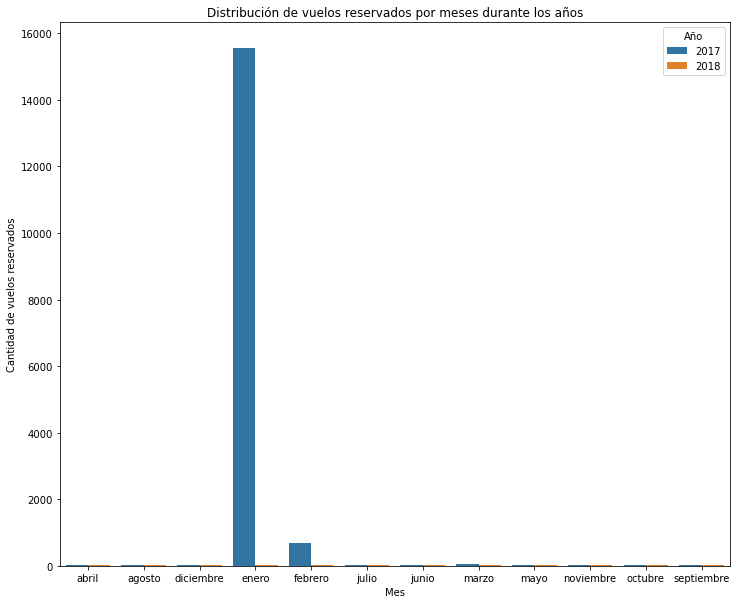

In [37]:
# Crear gráfico de barras agrupado por mes y año
plt.figure(figsize=(12, 10))
sns.barplot(x='Month', y='Cantidad de vuelos reservados', hue='Year', data=vuelos_por_anio_mes_df)
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.title('Distribución de vuelos reservados por meses durante los años')
plt.legend(title='Año')
plt.show()

EN LA SIGUIENTE GRAFICA Y CON ESTADISTICOS QUE TENEMOS ARRBA, NOS DAMOS CUENTA QUE EL MES DE ENERO Y FEBRERO DEL AÑO 2017, SON EN LOS QUE SE ENCUENTRAN MAYOR CANTIDAD DE VUELOS RESERVADOS, 

 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [38]:
# Calcular la correlación entre la distancia de los vuelos y los puntos acumulados por los clientes lo hare con el coeficiente de correlación de Pearson, 
#que es una medida de la relación lineal entre dos variables continuas.

correlacion = df_unido_merge['Distance'].corr(df_unido_merge['Points Accumulated'])

# Mostrar la correlación
print("Correlación entre la distancia de los vuelos y los puntos acumulados:", correlacion)

Correlación entre la distancia de los vuelos y los puntos acumulados: 0.9991670019563716


el valor es cercano a 1 lo que indica una correlacion positiva fuerte (cuando una variable sube la otra tambien)

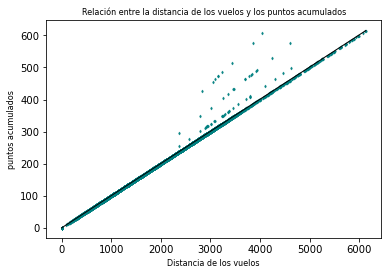

In [39]:
sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_unido_merge, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 3} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Distancia de los vuelos", fontsize = 8)
plt.ylabel("puntos acumulados", fontsize = 8)

# ponemos título a la gráfica
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados", fontsize = 8);

3. ¿Cuál es la distribución de los clientes por provincia o estado?

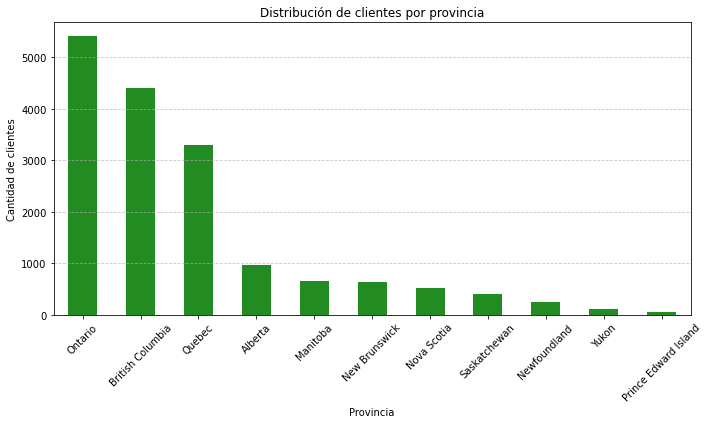

In [40]:
# Calcular el recuento de clientes por provincia o estado
clientes_por_provincia = df_unido_merge['Province'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
clientes_por_provincia.plot(kind='bar', color='forestgreen')
plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

DE ESTA MANERA PODEMOS OBSERVAR LA CANTIDAD DE CLIENTES QUE TENEMOS EN CADA PROVINCIA. PODEMOS VER CLARAMENTE QUE TENEMOS MAS CLIENTES EN ONTARIO, B.COLUMBIA Y QUEBEC 

¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [41]:
df_unido_merge['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [42]:
df_unido_merge['Salary'].unique()

array([ 83236.,  73455., 103495., ...,  76178.,  91970., -57297.])

la columna de salary encontramos valores en negativos que valos a cambiar a postiviso 

In [43]:
df_unido_merge['Salary'] = df_unido_merge['Salary'].abs()

In [44]:
#Agrupar el salario promedio por nivel educativo
salario_promedio_por_educacion = df_unido_merge.groupby('Education')['Salary'].mean().sort_values()
salario_promedio_por_educacion

Education
High School or Below     61199.161125
Bachelor                 72577.254415
College                  73455.000000
Master                  103757.848425
Doctor                  178608.897820
Name: Salary, dtype: float64

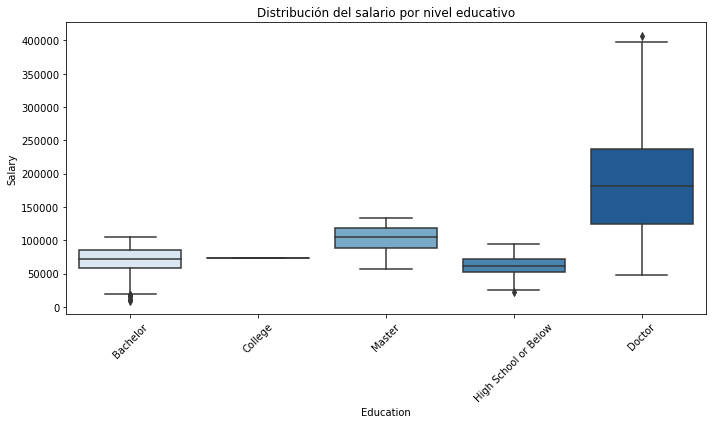

In [45]:
# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Salary', data=df_unido_merge, palette='Blues')
plt.title('Distribución del salario por nivel educativo')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

EN ESTA GRAFICA PODEMOS OBSERVAR LOS RANGOS DE SALARIO QUE EXISTE POR CADA GRUPO DE NIVEL EDUCATIVO, PODEMOS VER QUE ENTRE MAS ALTOES EL RANGO EL RANGO DEL SALARIO Y LA MEDIA DEL MISMO SE ENCUENTRA POR ARRIBA DE LOS OTROS GRUPOS, 

In [46]:
df_unido_merge.head(1)

Loyalty Number Country Province     City Postal Code  Gender Education  \
0          480934  Canada  Ontario  Toronto     M2Z 4K1  Female  Bachelor   

    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  83236.0        Married         Star  3839.14        Standard   

   Enrollment Year  Enrollment Month  Cancellation Year Cancellation Month  \
0             2016                 2                  0        desconocido   

   Year  Month  Flights Booked  Flights with Companions  Total Flights  \
0  2017  enero               0                        0              0   

   Distance  Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  
0         0                 0.0                0                            0

 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [47]:
# Contar el número de clientes por tipo de tarjeta de fidelidad
clientes_por_tarjeta = df_unido_merge['Loyalty Card'].value_counts()
clientes_por_tarjeta


Star      7637
Nova      5671
Aurora    3429
Name: Loyalty Card, dtype: int64

In [48]:

# Calcular la proporción de clientes para cada tipo de tarjeta de fidelidad
proporcion_clientes_por_tarjeta = clientes_por_tarjeta / len(df_unido_merge)* 100
proporcion_clientes_por_tarjeta

Star      45.629444
Nova      33.883014
Aurora    20.487543
Name: Loyalty Card, dtype: float64

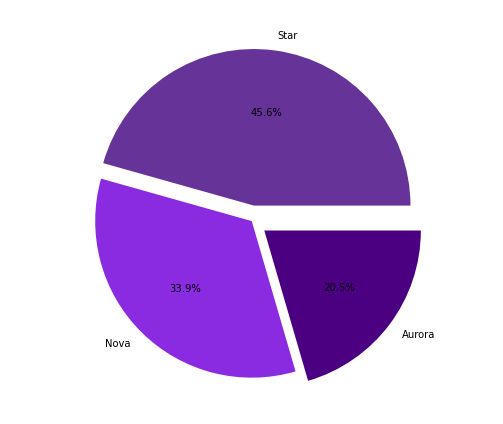

In [49]:
# Crear el gráfico de pastel
explode = ( 0.1 , 0, 0.1) # para sacar los quesitos hacia fuera
plt.figure(figsize=(8, 6))
proporcion_clientes_por_tarjeta.plot(kind='pie', autopct='%1.1f%%', colors=['rebeccapurple', 'blueviolet', 'indigo'], explode = explode)
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad', color = "white", fontsize = 16, fontweight = "bold")
plt.ylabel('')
plt.tight_layout()
plt.show()

EN EL SIGUIENTE GRAFICO SE MUESTRA LA PROPORCION DE LOS DIFERENTES TIPOS DE TARJETA DE FIDELIDAD QUE TIENEN NUESTRO CLIENTES. 

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [50]:
# Agrupar los clientes por estado civil y género y contar cuántos hay en cada grupo
distribucion_clientes = df_unido_merge.groupby(['Marital Status', 'Gender']).size().unstack()
distribucion_clientes

Gender          Female  Male
Marital Status              
Divorced          1269  1249
Married           4869  4866
Single            2272  2212

<Figure size 720x720 with 0 Axes>

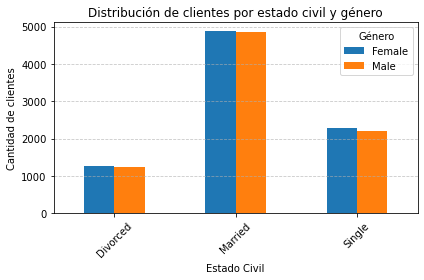

In [51]:
# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 10))
distribucion_clientes.plot(kind='bar')
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

FASE 3- EVALUACION DE DIFERENCIAS EN RESERVAS DE VUELOS POR NIVEL EDUCATIVO

-Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos
 reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
 1. Preparación de Datos:
 Preparación de Datos:
 Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
 
 2. Análisis Descriptivo:
 Análisis Descriptivo:
 Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
 número de vuelos reservados para cada grupo.
 3. Prueba Estadística:
 Prueba Estadística:
 Normas
 Normas
 Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
 niveles educativos.


In [52]:
# 1- preparacion de datos, filtramos el data frame original y sacamos solo las columnas que qurems
vuelos_edu= df_unido_merge.loc[:, ["Flights Booked", "Education"]]
vuelos_edu.head()

Flights Booked Education
0                0  Bachelor
24               9   College
48               8   College
72              15   College
96               0  Bachelor

In [53]:
# 2- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
stats_por_educacion = vuelos_edu.groupby('Education')['Flights Booked'].describe()
stats_por_educacion

count      mean       std  min  25%  50%  75%   max
Education                                                                  
Bachelor              10475.0  2.840477  4.015799  0.0  0.0  0.0  6.0  21.0
College                4238.0  2.875885  4.021617  0.0  0.0  0.0  6.0  21.0
Doctor                  734.0  2.956403  4.223724  0.0  0.0  0.0  6.0  20.0
High School or Below    782.0  2.882353  4.105706  0.0  0.0  0.0  6.0  18.0
Master                  508.0  2.962598  4.252459  0.0  0.0  0.0  6.0  19.0

3- Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [54]:
vuelos_edu["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [55]:
vuelos_edu.shape

(16737, 2)

In [56]:
vuelos_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16737 entries, 0 to 405600
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flights Booked  16737 non-null  int64 
 1   Education       16737 non-null  object
dtypes: int64(1), object(1)
memory usage: 908.3+ KB


In [57]:
vuelos_edu.isnull().sum()

Flights Booked    0
Education         0
dtype: int64

In [58]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [59]:
normalidad(vuelos_edu, "Flights Booked" )

Para la columna Flights Booked los datos no siguen una distribución normal.


/home/fedraadalab24/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


PRUEBA ESTADISTICA ANOVA

In [60]:
from scipy.stats import f_oneway

In [61]:
# Divido los datos en grupos según los diferentes niveles educativos

grupos_educativos = [vuelos_edu[vuelos_edu['Education'] == nivel]['Flights Booked'] for nivel in vuelos_edu['Education'].unique()]  # todo los uniques que encuentre en educacion los convierte a en un nivel 
                                #con esto encuentra el número de vuelos reservados para un nivel educativo específico.
#  grupos_educativos es una seria que contiene el número de vuelos reservados para un nivel educativo específico.


In [62]:
                                
# Realiza la prueba de ANOVA
p_value = f_oneway(*grupos_educativos).pvalue
print("Valor p de la prueba ANOVA:", p_value)


# Interpretación de los resultados
if p_value < 0.05:
    print("Se rechaza la hipótesis nula. Hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.")
else:
    print("No se puede rechazar la hipótesis nula. No hay evidencia suficiente para concluir que hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.")



# *Los resultados que obtenemos son:**

# **Estadístico F:** El estadístico F es el resultado principal de ANOVA. Representa la relación entre la variabilidad entre los grupos y la variabilidad dentro de los grupos. Un valor grande de F sugiere que al menos un par de medias son diferentes.

#Valor p:** El valor p asociado al estadístico F indica la probabilidad de obtener un valor de estadístico F tan extremo como el observado, asumiendo que las medias de todos los grupos son iguales. Un valor p pequeño (< 0.05) sugiere que puedes rechazar la hipótesis nula de igualdad de medias.



Valor p de la prueba ANOVA: 0.8973374849784482
No se puede rechazar la hipótesis nula. No hay evidencia suficiente para concluir que hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.


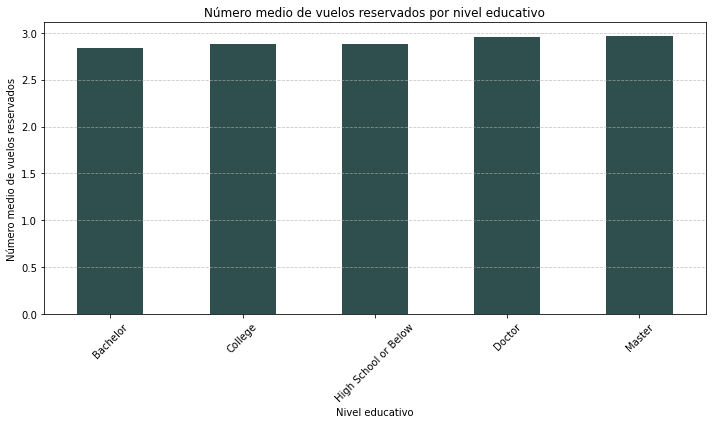

In [63]:


# Agrupar los datos por nivel educativo y calcular el número medio de vuelos reservados
reservas_por_educacion = vuelos_edu.groupby('Education')['Flights Booked'].mean().sort_values()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
reservas_por_educacion.plot(kind='bar', color='darkslategray')
plt.title('Número medio de vuelos reservados por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Número medio de vuelos reservados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

CONCLUIMOS QUE No hay evidencia suficiente para concluir que hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. DESDE QUE SACAMOS LA MEDIA POR CADA GRUPO EDUCATIVO PODEMOS OBSERVAR COMO SON MUY PARECIDAS TODAS ENTRE ELLAS. LO QUE NOS HACE SOSPECHAR DESDES U PRINCIPIO QUE NO HAY DIFERENTECIA SIGNIFICATIVA, DESPUES LO CMPROBAMOS CON LA GRAFICA.